# DSCI 521: Data Analysis and Interpretation <br> Term Project Phase 1: Walmart Sales Forecasting



### Team Members
- Group member 1
    - Name: Padma Priya Jayaraj
    - Email: pj349@drexel.edu
- Group member 2
    - Name: Soumya Sinha
    - Email: ss4947@drexel.edu
- Group member 3
    - Name: Himani Hasani
    - Email: hh579@drexel.edu
- Group member 4
    - Name: Nishant Anand
    - Email: na826@drexel.edu

In [1]:
import numpy as np 
import pandas as pd
import statistics
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as skl

In [2]:
new_features = pd.read_csv("Walmart_data/features.csv")
new_features.head(2)

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True

In [3]:
new_stores = pd.read_csv("Walmart_data/stores.csv")
new_stores.head(2)

Store Type    Size
0      1    A  151315
1      2    A  202307

In [4]:
new_train = pd.read_csv("Walmart_data/train.csv")
new_train.head(2)

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True

In [5]:
walmartData = pd.read_csv("Walmart_data/train.csv")
del walmartData['IsHoliday']
walmartData.head(2)

Store  Dept        Date  Weekly_Sales
0      1     1  2010-02-05      24924.50
1      1     1  2010-02-12      46039.49

In [6]:
new1_concat = pd.merge(new_train, new_features,  how='left', left_on=['Store','Date'], right_on = ['Store','Date'])
new_concat = new1_concat.merge(new_stores, left_on='Store', right_on='Store')
new_concat.set_index('Store',inplace=True)
new_concat.to_csv("data/New_Merged_walmart.csv")
merged_walmart = pd.read_csv("data/New_Merged_walmart.csv", parse_dates=["Date"])
merged_walmart.head(5)

Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50        False        42.31       2.572   
1      1     1 2010-02-12      46039.49         True        38.51       2.548   
2      1     1 2010-02-19      41595.55        False        39.93       2.514   
3      1     1 2010-02-26      19403.54        False        46.63       2.561   
4      1     1 2010-03-05      21827.90        False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  IsHoliday_y Type    Size  
0         8.106        False    A  151315  
1         8.106         True    A  151315  
2         8.106        False    A  151315  
3         8.106        False    A  151315  
4         8.106        False    A  151315

In [7]:
merged_walmart.describe()

Store           Dept   Weekly_Sales    Temperature  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123      60.090059   
std        12.785297      30.492054   22711.183519      18.447931   
min         1.000000       1.000000   -4988.940000      -2.060000   
25%        11.000000      18.000000    2079.650000      46.680000   
50%        22.000000      37.000000    7612.030000      62.090000   
75%        33.000000      74.000000   20205.852500      74.280000   
max        45.000000      99.000000  693099.360000     100.140000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  421570.000000  150681.000000  111248.000000  137091.000000   
mean        3.361027    7246.420196    3334.628621    1439.421384   
std         0.458515    8291.221345    9475.357325    9623.078290   
min         2.472000       0.270000    -265.760000     -29.100000   
25%         2.933000    2240.270000      41.600000       5.080000   
50%         3.452000    5347.450000     192.000000      24.600000   
75%         3.738000    9210.900000    1926.940000     103.990000   
max         4.468000   88646.760000  104519.540000  141630.610000   

           MarkDown4      MarkDown5            CPI   Unemployment  \
count  134967.000000  151432.000000  421570.000000  421570.000000   
mean     3383.168256    4628.975079     171.201947       7.960289   
std      6292.384031    5962.887455      39.159276       1.863296   
min         0.220000     135.160000     126.064000       3.879000   
25%       504.220000    1878.440000     132.022667       6.891000   
50%      1481.310000    3359.450000     182.318780       7.866000   
75%      3595.040000    5563.800000     212.416993       8.572000   
max     67474.850000  108519.280000     227.232807      14.313000   

                Size  
count  421570.000000  
mean   136727.915739  
std     60980.583328  
min     34875.000000  
25%     93638.000000  
50%    140167.000000  
75%    202505.000000  
max    219622.000000

In [8]:
#Create DF for all the time series seperately
timeseriesCount=0
for eachStore in list(walmartData.Store.unique()): 
    eachStoreDf=walmartData[walmartData['Store']==eachStore] 
    for eachDept in list(eachStoreDf.Dept.unique()): 
        eachStoreDeptDf=eachStoreDf[eachStoreDf['Dept']==eachDept] 
        fileName="data/Store"+str(eachStore)+"_"+"Dept"+str(eachDept)+".csv" 
        eachStoreDeptDf.to_csv(fileName) 
        timeseriesCount=timeseriesCount+1
print("Total number of time series :",timeseriesCount)

Total number of time series : 3331


In [9]:
def assigning_date_as_index(c):
    c.Date = pd.to_datetime(c.Date,format='%Y-%m-%d')
    c.index = c.Date
    c = c.drop('Date', axis=1)
    return c

### Univariate Time Series Model

In [12]:
from sklearn import metrics
from pmdarima.arima import auto_arima

from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

import statsmodels.api as sm

from pandas.tseries.offsets import DateOffset

from statsmodels.tsa.stattools import adfuller
def stationary(data):
    test_result=adfuller(data)
    if test_result[1]>0.05: #test_result[1] is the p-value ['Test Statistic','p-value','# Lags','# Observations']
        print(test_result[1],"The Data is non- Stationary and make it stationary")
        return 1
    else:
        return 0
        
def splitData(data):
    train_data = data[:int(0.7*(len(data)))]
    test_data = data[int(0.7*(len(data))):]
    full_data=data
    return train_data,test_data,full_data
    
def plotForecast(data,y_pred,modelName,StoreId,DeptId):
        train_data,test_data,full_data=splitData(data)
        plt.figure(figsize=(20,6))
        if StoreId is not None and DeptId is not None:
            plt.title('Prediction of Weekly Sales using '+modelName+" for StoreId= "+str(StoreId)+" and DeptId= "+str(DeptId), fontsize=20)
        elif StoreId is not None:
            plt.title('Prediction of Weekly Sales using '+modelName+" for StoreId= "+str(StoreId), fontsize=20)
        elif DeptId is not None:
            plt.title('Prediction of Weekly Sales using '+modelName+" for DeptId= "+str(DeptId), fontsize=20)
            
        plt.plot(train_data, label='Train')
        plt.plot(test_data, label='Test')
        plt.plot(y_pred, label='Prediction')
        plt.legend(loc='best')
        plt.xlabel('Date', fontsize=20)
        plt.ylabel('Weekly Sales', fontsize=20)
        plt.show()
    
def univariateModel(StoreID,DeptId):
    #Selecting a random Timeseries
    if StoreID is not None and DeptId is not None:
        filename = "data/Store"+str(StoreID)+"_Dept"+str(DeptId)+".csv"
    elif StoreID is not None:
        filename = "data/Store"+str(StoreID)+".csv"
    elif DeptId is not None:
        filename = "data/Dept"+str(DeptId)+".csv"
        
        
    uniVariateData = pd.read_csv(filename)
    uniVariateData=uniVariateData[['Date','Weekly_Sales']]
    uniVariateData = assigning_date_as_index(uniVariateData)
    
    #To make the data stationary
    #if stationary(uniVariateData['Weekly_Sales'])==1:
        #uniVariateData['Weekly_Sales'] = uniVariateData['Weekly_Sales'] - uniVariateData['Weekly_Sales'].shift(1)
    #uniVariateData['Weekly_Sales']=uniVariateData['Weekly_Sales']-uniVariateData['Weekly_Sales'].shift(12)
    #adfuller(uniVariateData['Weekly_Sales'].dropna())
    
    #Future Forecast
    upcoming_future_dates=[uniVariateData['Weekly_Sales'].index[-1]+ DateOffset(weeks=x)for x in range(0,16)]
    future_df=pd.DataFrame(index=upcoming_future_dates[1:],columns=uniVariateData.columns)
    
    def arima_model(c,modelTraining):
        train_data_diff,test_data_diff,full_data=splitData(c)
        train_data_diff = train_data_diff['Weekly_Sales']
        test_data_diff = test_data_diff['Weekly_Sales']
        
        if modelTraining:
            model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                      max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                      information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                      error_action='ignore',approximation = False)
            model_auto_arima.fit(train_data_diff)
            y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
            y_pred = pd.DataFrame(y_pred,index = test_data_diff.index,columns=['Prediction'])
            arima_rmse =np.sqrt(metrics.mean_squared_error(test_data_diff,y_pred))
        else:
            model_auto_arima = auto_arima(full_data, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                      max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                      information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                      error_action='ignore',approximation = False)
            model_auto_arima.fit(full_data)
            y_pred = model_auto_arima.predict(n_periods=15)
            y_pred = pd.DataFrame(y_pred,index = future_df.index,columns=['Prediction'])
            arima_rmse = 0

        return arima_rmse,y_pred

    def holtwinters(c,modelTraining):
        train_data_diff_holtwinters,test_data_diff_holtwinters,full_data=splitData(c)
        train_data_diff_holtwinters = train_data_diff_holtwinters['Weekly_Sales']
        test_data_diff_holtwinters = test_data_diff_holtwinters['Weekly_Sales']
        
        if modelTraining:
            model_holt_winters = ExponentialSmoothing(train_data_diff_holtwinters, seasonal_periods=20, seasonal='additive',
                                               trend='additive',damped=True).fit()
            y_pred = model_holt_winters.forecast(len(test_data_diff_holtwinters))
            holtwinters_rmse=np.sqrt(metrics.mean_squared_error(test_data_diff_holtwinters,y_pred))
        
        else:
            model_holt_winters = ExponentialSmoothing(full_data, seasonal_periods=20, seasonal='additive',
                                               trend='additive',damped=True).fit()
            y_pred = model_holt_winters.forecast(15)
            holtwinters_rmse=0
        
        return holtwinters_rmse,y_pred

    def sarima(c,modelTraining):
        
        train_data_diff,test_data_diff,full_data=splitData(c)
        print(len(train_data_diff))
        print(len(test_data_diff))
        train_data_diff = train_data_diff['Weekly_Sales']
        test_data_diff = test_data_diff['Weekly_Sales']
        if modelTraining:
            model_pred = auto_arima(train_data_diff, start_p=0, start_q=0, max_p=3, max_q=3,
                                               m=12, trace=True, 
                                               error_action='ignore',seasonal=True, suppress_warnings=True)
            model_pred.fit(train_data_diff)
            pred = np.round(model_pred.predict(n_periods=len(test_data_diff)))
            y_pred = pd.DataFrame(pred,index = test_data_diff.index,columns=['Prediction'])
            
            Sarima_rmse=np.sqrt(metrics.mean_squared_error(test_data_diff,y_pred))#sqrt(mean_squared_error(test_data_diff,y_pred))
        else:
            
            model_pred = auto_arima(full_data, start_p=0, start_q=0, max_p=3, max_q=3,
                                               m=12, trace=True, 
                                               error_action='ignore',seasonal=True, suppress_warnings=True)
            model_pred.fit(full_data)
            pred = np.round(model_pred.predict(n_periods=15))
            y_pred = pd.DataFrame(pred,index = future_df.index,columns=['Prediction'])
            
            Sarima_rmse=0
        return Sarima_rmse,y_pred
    
    arima_rmse,arima_y_pred=arima_model(uniVariateData,True)
    holtwinters_rmse,hotlwinter_y_pred=holtwinters(uniVariateData,True)
    Sarima_rmse,sarima_y_pred=sarima(uniVariateData,True)
    
    print("RMSE================")
    print("arima_rmse",arima_rmse)
    print("holtwinters_rmse",holtwinters_rmse)
    print("Sarima_rmse",Sarima_rmse)
    print("================")
    
    #Add logic to select the best model
    if (arima_rmse<=holtwinters_rmse and arima_rmse<=Sarima_rmse):
        arima_rmse,arima_y_pred_for=arima_model(uniVariateData,False)
        plotForecast(uniVariateData,arima_y_pred_for,"Arima",StoreID,DeptId)
        
    elif(holtwinters_rmse<=arima_rmse and holtwinters_rmse<=Sarima_rmse):
        holtwinters_rmse,hotlwinter_y_pred_for=holtwinters(uniVariateData,False)
        plotForecast(uniVariateData,hotlwinter_y_pred_for,"HoltWinter",StoreID,DeptId)
        
    else:
        Sarima_rmse,sarima_y_pred=sarima(uniVariateData,False)
        plotForecast(uniVariateData,sarima_y_pred,"Sarima",StoreID,DeptId)

### Time Series Forecasting at Store and Department Level

Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=2279.669, BIC=2284.859, Time=0.015 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=2248.988, BIC=2256.774, Time=0.036 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=2249.406, BIC=2259.786, Time=0.035 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=2250.564, BIC=2263.539, Time=0.043 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=2242.518, BIC=2258.088, Time=0.067 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=2246.290, BIC=2264.455, Time=0.083 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=2275.466, BIC=2283.252, Time=0.021 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=2258.066, BIC=2268.447, Time=0.057 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=2254.654, BIC=2267.630, Time=0.059 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=2252.132, BIC=2267.703, Time=0.051 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=2263.116, BIC=2281.282, Time=0.

/Users/nishantanand/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
/Users/nishantanand/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


100
43
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,12) [intercept=True]; AIC=2280.568, BIC=2290.948, Time=0.067 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=2279.669, BIC=2284.859, Time=0.009 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=2276.527, BIC=2286.907, Time=0.044 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=2250.612, BIC=2260.993, Time=0.066 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=2277.756, BIC=2280.351, Time=0.011 seconds
Fit ARIMA(0,1,1)x(0,0,0,12) [intercept=True]; AIC=2248.988, BIC=2256.774, Time=0.032 seconds
Fit ARIMA(0,1,1)x(1,0,0,12) [intercept=True]; AIC=2250.857, BIC=2261.238, Time=0.057 seconds
Fit ARIMA(0,1,1)x(1,0,1,12) [intercept=True]; AIC=2250.779, BIC=2263.755, Time=0.097 seconds
Fit ARIMA(1,1,1)x(0,0,0,12) [intercept=True]; AIC=2258.066, BIC=2268.447, Time=0.064 seconds
Fit ARIMA(0,1,2)x(0,0,0,12) [intercept=True]; AIC=2249.406, BIC=2259.786, Time=0.035 seconds
Fit ARIMA(1,1,0)x(0

/Users/nishantanand/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
/Users/nishantanand/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


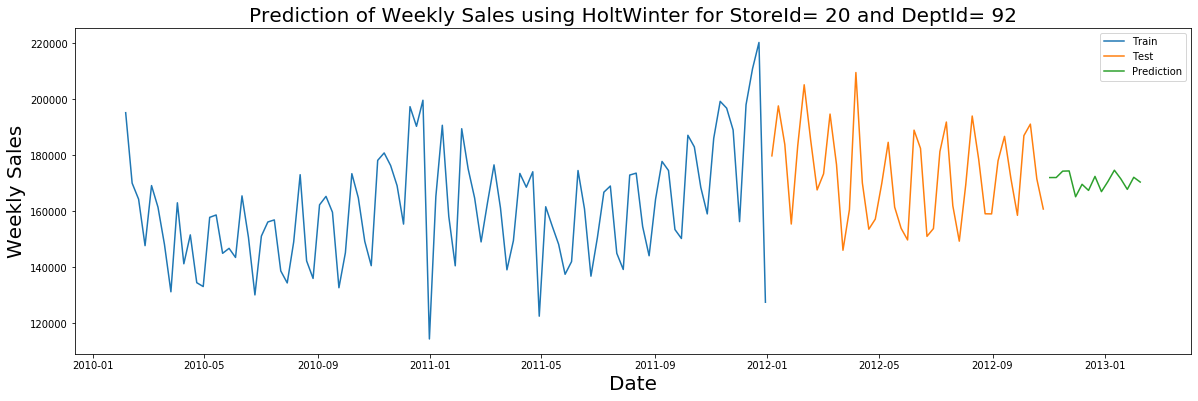

In [13]:
univariateModel(StoreID=20,DeptId=92)

Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=1611.251, BIC=1616.441, Time=0.014 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=1597.401, BIC=1605.187, Time=0.091 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=1598.573, BIC=1608.953, Time=0.085 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=1600.265, BIC=1613.240, Time=0.114 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=1600.165, BIC=1615.735, Time=0.062 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=1590.815, BIC=1608.981, Time=0.177 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=1602.274, BIC=1610.059, Time=0.021 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=1598.323, BIC=1608.704, Time=0.161 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=1597.833, BIC=1610.809, Time=0.378 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=1597.571, BIC=1613.142, Time=0.166 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=1596.992, BIC=1615.158, Time=0.

/Users/nishantanand/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
/Users/nishantanand/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


100
43
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,12) [intercept=True]; AIC=1610.917, BIC=1621.298, Time=0.305 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=1611.251, BIC=1616.441, Time=0.013 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=1604.007, BIC=1614.387, Time=0.056 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=1599.049, BIC=1609.430, Time=0.154 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=1609.311, BIC=1611.906, Time=0.009 seconds
Fit ARIMA(0,1,1)x(0,0,0,12) [intercept=True]; AIC=1597.401, BIC=1605.187, Time=0.086 seconds
Fit ARIMA(0,1,1)x(1,0,0,12) [intercept=True]; AIC=1599.028, BIC=1609.409, Time=0.173 seconds
Fit ARIMA(0,1,1)x(1,0,1,12) [intercept=True]; AIC=1600.464, BIC=1613.439, Time=0.581 seconds
Near non-invertible roots for order (0, 1, 1)(1, 0, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA(1,1,1)x(0,0,0,12) [intercept=True]; 

/Users/nishantanand/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
/Users/nishantanand/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


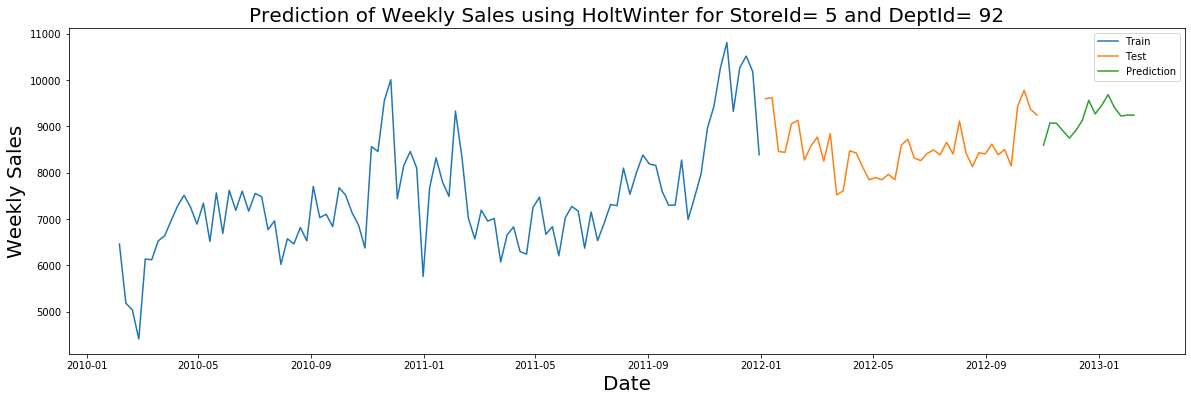

In [12]:
univariateModel(StoreID=5,DeptId=92)

### Time Series Forecasting at Store Level

In [13]:
print('No.of Unique Stores:',walmartData['Store'].nunique())

No.of Unique Stores: 45


In [14]:
store_level_data = pd.pivot_table(walmartData, index='Date', columns='Store', values='Weekly_Sales', aggfunc=np.mean)
store_level_data.to_csv('data/StoreLevelData.csv')
store_level_data.head(5)

Store                 1             2            3             4   \
Date                                                                
2010-02-05  22516.313699  29273.828219  7101.880308  29248.546164   
2010-02-12  22804.964444  29691.798611  6573.890000  29177.431867   
2010-02-19  22081.755753  29102.075890  6486.802923  28080.277534   
2010-02-26  19579.549861  25549.277671  6463.569206  26023.362703   
2010-03-05  21298.721644  27274.152466  6590.508571  27375.797778   

Store                5             6            7             8            9   \
Date                                                                            
2010-02-05  5115.695161  22638.836986  6898.964444  14552.711449  8862.992742   
2010-02-12  4797.318462  22003.888493  7487.213143  14011.287324  8772.658413   
2010-02-19  4668.424154  21765.806528  7137.472394  13770.862429  7866.583077   
2010-02-26  4158.178923  19629.496027  6987.087887  12283.943623  7402.707344   
2010-03-05  4513.370469  21936.285205  6921.402113  12415.548592  8052.347302   

Store                 10  ...            36            37           38  \
Date                      ...                                            
2010-02-05  29240.650000  ...  12303.861579  10938.912857  7029.336078   
2010-02-12  29405.790811  ...  12690.910811  11038.597917  6844.298000   
2010-02-19  28179.101067  ...  12375.816579  10632.968750  6544.758400   
2010-02-26  26404.933684  ...  11474.857436  10481.955510  6962.973542   
2010-03-05  26494.534533  ...  12636.932368  10385.113600  7596.732449   

Store                 39            40            41            42  \
Date                                                                 
2010-02-05  18097.011765  14520.924638  15303.284225  11812.695870   
2010-02-12  17834.212254  13647.689857  15150.089296  12249.148085   
2010-02-19  17834.666232  13089.845714  15029.067714  10383.568776   
2010-02-26  17185.029706  12167.850845  13588.242877  10685.012609   
2010-03-05  18089.345857  13945.806761  14979.682958  12064.617826   

Store                 43           44            45  
Date                                                 
2010-02-05  13479.776667  5856.061458  13293.873284  
2010-02-12  14846.065000  5976.190208   9661.597647  
2010-02-19  13729.115625  5582.422917  12192.232464  
2010-02-26  12889.641458  5810.192979  10598.452143  
2010-03-05  14317.392391  5692.345400  11611.212239  

[5 rows x 45 columns]

In [15]:
for eachStore in store_level_data:
    fileName="data/Store"+str(eachStore)+".csv" 
    store_level_dataTemp=store_level_data.rename(columns={eachStore:'Weekly_Sales'}, inplace=False)
    (store_level_dataTemp.loc[:,['Weekly_Sales']]).to_csv(fileName) 

Fit ARIMA(0,0,0)x(0,0,0,1) [intercept=True]; AIC=1567.221, BIC=1572.432, Time=0.014 seconds
Fit ARIMA(0,0,1)x(0,0,0,1) [intercept=True]; AIC=1561.539, BIC=1569.355, Time=0.077 seconds
Fit ARIMA(0,0,2)x(0,0,0,1) [intercept=True]; AIC=1561.943, BIC=1572.363, Time=0.034 seconds
Fit ARIMA(0,0,3)x(0,0,0,1) [intercept=True]; AIC=1562.155, BIC=1575.181, Time=0.197 seconds
Fit ARIMA(0,0,4)x(0,0,0,1) [intercept=True]; AIC=1541.311, BIC=1556.942, Time=0.187 seconds
Fit ARIMA(0,0,5)x(0,0,0,1) [intercept=True]; AIC=1543.300, BIC=1561.536, Time=0.204 seconds
Fit ARIMA(1,0,0)x(0,0,0,1) [intercept=True]; AIC=1559.350, BIC=1567.165, Time=0.016 seconds
Fit ARIMA(1,0,1)x(0,0,0,1) [intercept=True]; AIC=1559.705, BIC=1570.126, Time=0.155 seconds
Fit ARIMA(1,0,2)x(0,0,0,1) [intercept=True]; AIC=1562.557, BIC=1575.583, Time=0.075 seconds
Fit ARIMA(1,0,3)x(0,0,0,1) [intercept=True]; AIC=1557.691, BIC=1573.322, Time=0.218 seconds
Fit ARIMA(1,0,4)x(0,0,0,1) [intercept=True]; AIC=1543.483, BIC=1561.719, Time=0.

/Users/nishantanand/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


100
43
Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(1,0,1,12) [intercept=True]; AIC=1571.143, BIC=1581.564, Time=0.179 seconds
Fit ARIMA(0,0,0)x(0,0,0,12) [intercept=True]; AIC=1567.221, BIC=1572.432, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,0,0,12) [intercept=True]; AIC=1561.212, BIC=1571.632, Time=0.116 seconds
Fit ARIMA(0,0,1)x(0,0,1,12) [intercept=True]; AIC=1563.426, BIC=1573.847, Time=0.215 seconds
Fit ARIMA(0,0,0)x(0,0,0,12) [intercept=False]; AIC=1989.225, BIC=1991.830, Time=0.007 seconds
Fit ARIMA(1,0,0)x(0,0,0,12) [intercept=True]; AIC=1559.350, BIC=1567.165, Time=0.022 seconds
Fit ARIMA(1,0,0)x(0,0,1,12) [intercept=True]; AIC=1674.895, BIC=1685.316, Time=0.062 seconds
Near non-invertible roots for order (1, 0, 0)(0, 0, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA(1,0,0)x(1,0,1,12) [intercept=True]; AIC=1563.108, BIC=1576.134, Time=0.334 seconds
Fit ARIMA(2,0,0)x(0,0,0,12) [intercept=True]; 

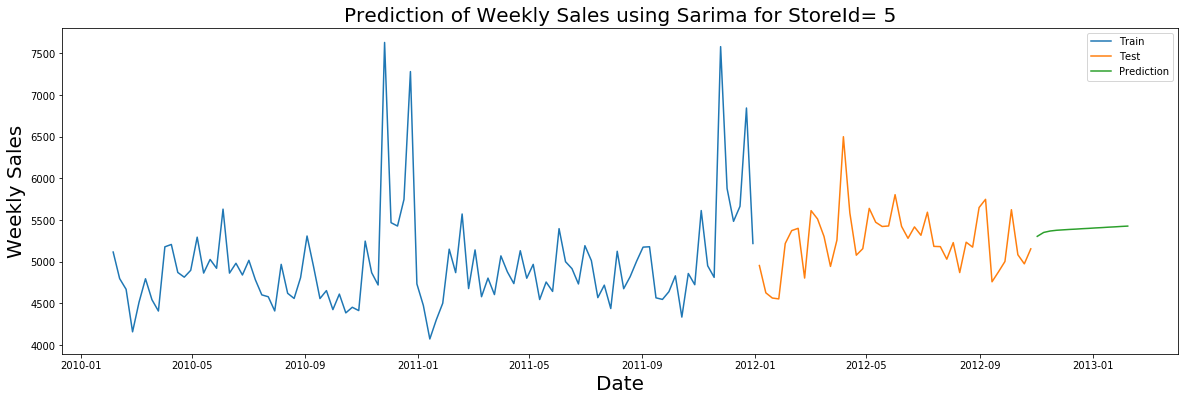

In [16]:
univariateModel(StoreID=5,DeptId=None)

### Time Series Forecasting at Department Level

In [17]:
print('No.of Unique Departments:',walmartData['Dept'].nunique())

No.of Unique Departments: 81


In [18]:
dept_level_data = pd.pivot_table(walmartData, index='Date', columns='Dept', values='Weekly_Sales', aggfunc=np.mean)
dept_level_data.head(5)
dept_level_data.to_csv('data/DeptLevelData.csv')

In [19]:
for eachDept in dept_level_data:
    fileName="data/Dept"+str(eachDept)+".csv" 
    dept_level_dataTemp=dept_level_data.rename(columns={eachDept:'Weekly_Sales'}, inplace=False)
    (dept_level_dataTemp.loc[:,['Weekly_Sales']]).to_csv(fileName) 

Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=2078.395, BIC=2083.585, Time=0.011 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=2054.030, BIC=2061.816, Time=0.110 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=2054.776, BIC=2065.156, Time=0.046 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=2057.105, BIC=2070.080, Time=0.117 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=2050.504, BIC=2066.075, Time=0.140 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=2050.992, BIC=2069.158, Time=0.227 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=2064.879, BIC=2072.664, Time=0.041 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=2058.445, BIC=2068.826, Time=0.093 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=2057.483, BIC=2070.458, Time=0.103 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=2051.616, BIC=2067.186, Time=0.169 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=2051.693, BIC=2069.859, Time=0.

/Users/nishantanand/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
/Users/nishantanand/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


100
43
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,12) [intercept=True]; AIC=2076.885, BIC=2087.265, Time=0.336 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=2078.395, BIC=2083.585, Time=0.041 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=2063.990, BIC=2074.371, Time=0.131 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=2054.457, BIC=2064.838, Time=0.353 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=2076.451, BIC=2079.046, Time=0.013 seconds
Fit ARIMA(0,1,1)x(0,0,0,12) [intercept=True]; AIC=2054.030, BIC=2061.816, Time=0.256 seconds
Fit ARIMA(0,1,1)x(1,0,0,12) [intercept=True]; AIC=2054.561, BIC=2064.942, Time=0.349 seconds
Fit ARIMA(0,1,1)x(1,0,1,12) [intercept=True]; AIC=2059.350, BIC=2072.325, Time=0.332 seconds
Fit ARIMA(1,1,1)x(0,0,0,12) [intercept=True]; AIC=2058.445, BIC=2068.826, Time=0.121 seconds
Fit ARIMA(0,1,2)x(0,0,0,12) [intercept=True]; AIC=2054.776, BIC=2065.156, Time=0.080 seconds
Fit ARIMA(1,1,0)x(0

/Users/nishantanand/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
/Users/nishantanand/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


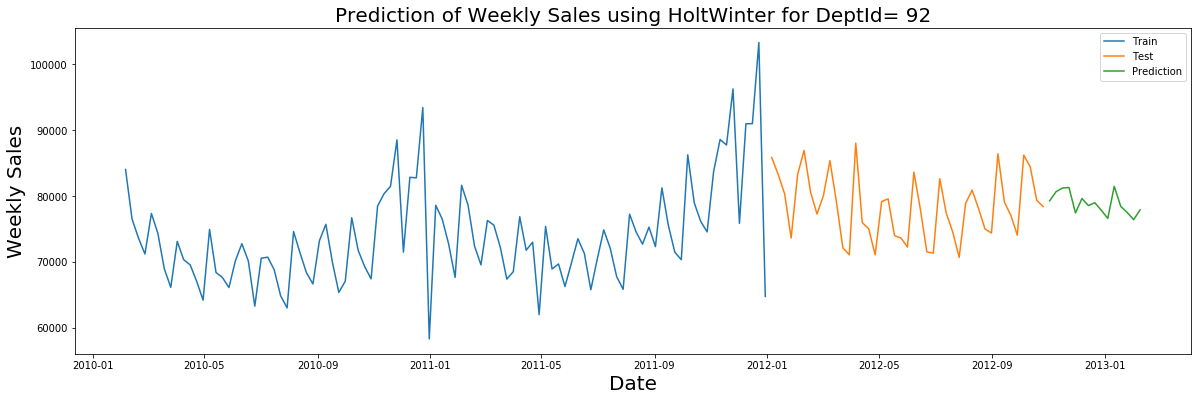

In [20]:
univariateModel(StoreID=None,DeptId=92)

## Store Vs Sale

Text(0.5, 0, 'Store')

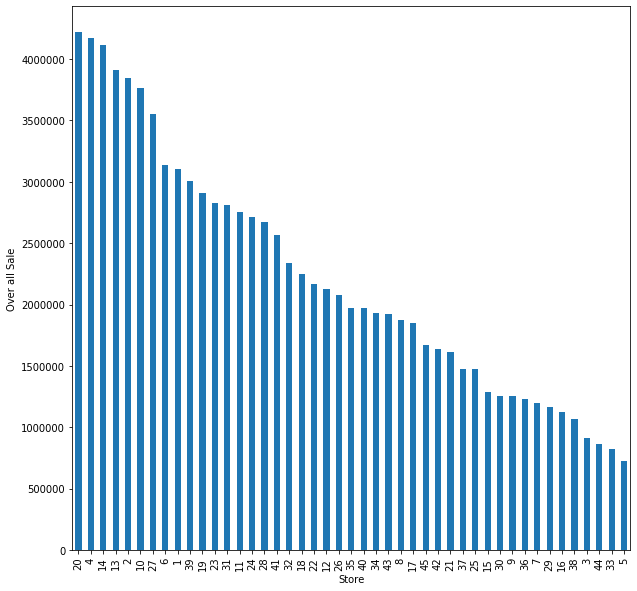

In [21]:
StoreVsSale=store_level_data.agg("sum", axis="rows").sort_values(ascending=False).plot(kind='bar',figsize=(10,10))
StoreVsSale.set_ylabel("Over all Sale")
StoreVsSale.set_xlabel("Store")

Fit ARIMA(0,0,0)x(0,0,0,1) [intercept=True]; AIC=1953.155, BIC=1958.365, Time=0.013 seconds
Fit ARIMA(0,0,1)x(0,0,0,1) [intercept=True]; AIC=1946.164, BIC=1953.980, Time=0.021 seconds
Fit ARIMA(0,0,2)x(0,0,0,1) [intercept=True]; AIC=1942.760, BIC=1953.180, Time=0.026 seconds
Fit ARIMA(0,0,3)x(0,0,0,1) [intercept=True]; AIC=1944.536, BIC=1957.562, Time=0.131 seconds
Fit ARIMA(0,0,4)x(0,0,0,1) [intercept=True]; AIC=1932.074, BIC=1947.705, Time=0.092 seconds
Fit ARIMA(0,0,5)x(0,0,0,1) [intercept=True]; AIC=1931.967, BIC=1950.204, Time=0.082 seconds
Fit ARIMA(1,0,0)x(0,0,0,1) [intercept=True]; AIC=1941.324, BIC=1949.139, Time=0.021 seconds
Fit ARIMA(1,0,1)x(0,0,0,1) [intercept=True]; AIC=1941.374, BIC=1951.794, Time=0.046 seconds
Fit ARIMA(1,0,2)x(0,0,0,1) [intercept=True]; AIC=1942.898, BIC=1955.924, Time=0.063 seconds
Fit ARIMA(1,0,3)x(0,0,0,1) [intercept=True]; AIC=1944.098, BIC=1959.729, Time=0.078 seconds
Fit ARIMA(1,0,4)x(0,0,0,1) [intercept=True]; AIC=1935.218, BIC=1953.454, Time=0.

/Users/nishantanand/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


100
43
Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(1,0,1,12) [intercept=True]; AIC=1955.704, BIC=1966.124, Time=0.143 seconds
Fit ARIMA(0,0,0)x(0,0,0,12) [intercept=True]; AIC=1953.155, BIC=1958.365, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,0,0,12) [intercept=True]; AIC=1943.158, BIC=1953.579, Time=0.099 seconds
Fit ARIMA(0,0,1)x(0,0,1,12) [intercept=True]; AIC=1947.603, BIC=1958.024, Time=0.056 seconds
Fit ARIMA(0,0,0)x(0,0,0,12) [intercept=False]; AIC=2346.811, BIC=2349.416, Time=0.006 seconds
Fit ARIMA(1,0,0)x(0,0,0,12) [intercept=True]; AIC=1941.324, BIC=1949.139, Time=0.017 seconds
Fit ARIMA(1,0,0)x(0,0,1,12) [intercept=True]; AIC=1943.032, BIC=1953.453, Time=0.138 seconds
Fit ARIMA(1,0,0)x(1,0,1,12) [intercept=True]; AIC=1945.026, BIC=1958.052, Time=0.415 seconds
Fit ARIMA(2,0,0)x(0,0,0,12) [intercept=True]; AIC=1939.266, BIC=1949.687, Time=0.027 seconds
Fit ARIMA(2,0,0)x(1,0,0,12) [intercept=True]; AIC=1941.045, BIC=1954.070, Time=0.128 seconds
Fit ARIMA(2,0,0)x(0

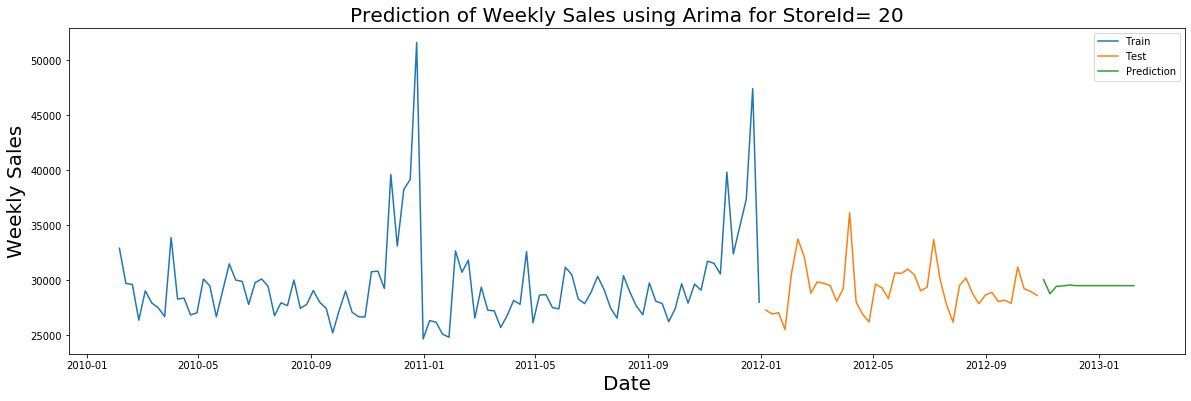

In [22]:
univariateModel(StoreID=20,DeptId=None)

## Time Vs Sale

Text(0.5, 0, 'Date')

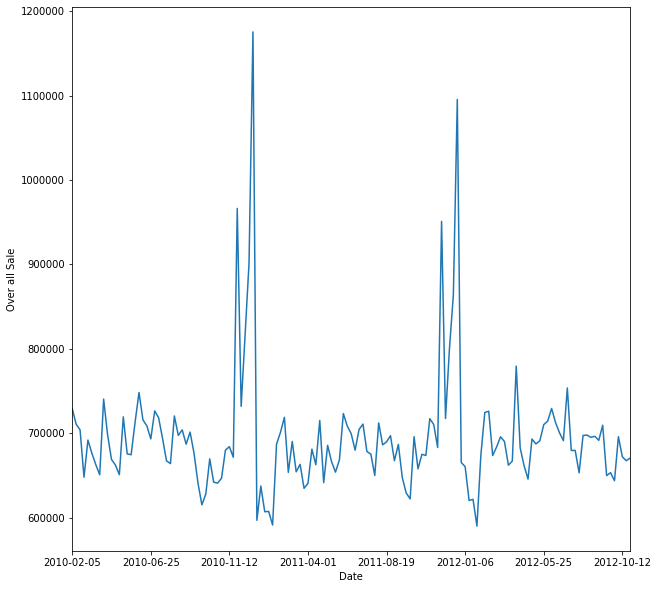

In [23]:
TimeVsSale=store_level_data.agg("sum", axis="columns").plot(kind='line',figsize=(10,10))
TimeVsSale.set_ylabel("Over all Sale")
TimeVsSale.set_xlabel("Date")

## Department Vs Sale

Text(0.5, 0, 'Dept')

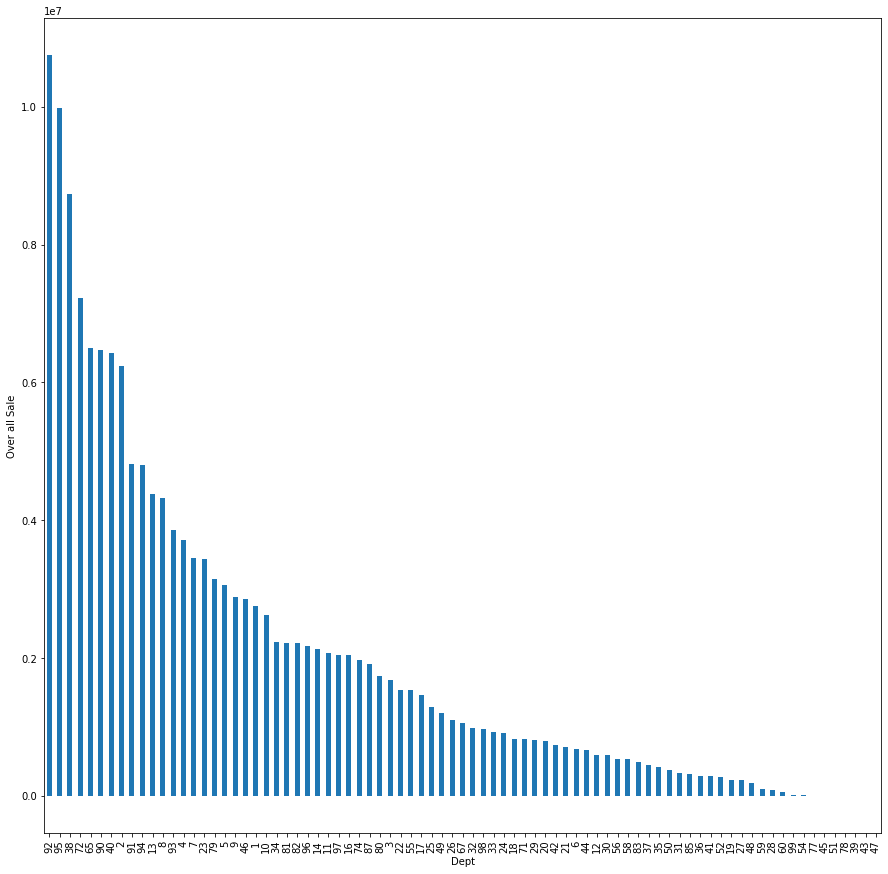

In [24]:
DeptVsSale=dept_level_data.agg("sum", axis="rows").sort_values(ascending=False).plot(kind='bar',figsize=(15,15))
DeptVsSale.set_ylabel("Over all Sale")
DeptVsSale.set_xlabel("Dept")

## Multivariate Models

In [25]:
# loading essential libraries first
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

In [26]:
fileName="data/Multivariate/Store"+str(20)+".csv" 
df=pd.read_csv(fileName)
df=df.drop(['Unnamed: 0','Store'],axis=1)

df = assigning_date_as_index(df)
df=df[['Weekly_Sales','Temperature','Fuel_Price']]
print(df.tail())

            Weekly_Sales  Temperature  Fuel_Price
Date                                             
2012-09-28  27893.758056        58.65       3.997
2012-10-05  31200.165139        60.77       3.985
2012-10-12  29229.072432        47.20       4.000
2012-10-19  28976.282464        56.26       3.969
2012-10-26  28614.796479        60.04       3.882


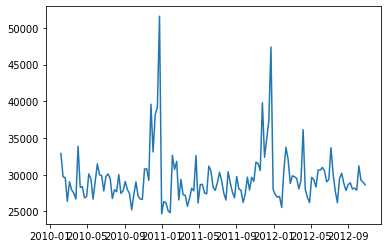

In [27]:
plt.plot(df['Weekly_Sales'])

In [28]:
# import for Granger's Causality Test
from statsmodels.tsa.stattools import grangercausalitytests
granger_test = sm.tsa.stattools.grangercausalitytests(df[['Weekly_Sales','Temperature']], maxlag=2, verbose=True)
granger_test = sm.tsa.stattools.grangercausalitytests(df[['Weekly_Sales','Fuel_Price']], maxlag=2, verbose=True)
#granger_test = sm.tsa.stattools.grangercausalitytests(df[['Weekly_Sales','Weekly_Sales']], maxlag=2, verbose=True)

    


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1466  , p=0.1451  , df_denom=139, df_num=1
ssr based chi2 test:   chi2=2.1929  , p=0.1386  , df=1
likelihood ratio test: chi2=2.1762  , p=0.1402  , df=1
parameter F test:         F=2.1466  , p=0.1451  , df_denom=139, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1384  , p=0.3234  , df_denom=136, df_num=2
ssr based chi2 test:   chi2=2.3605  , p=0.3072  , df=2
likelihood ratio test: chi2=2.3410  , p=0.3102  , df=2
parameter F test:         F=1.1384  , p=0.3234  , df_denom=136, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0014  , p=0.9702  , df_denom=139, df_num=1
ssr based chi2 test:   chi2=0.0014  , p=0.9699  , df=1
likelihood ratio test: chi2=0.0014  , p=0.9699  , df=1
parameter F test:         F=0.0014  , p=0.9702  , df_denom=139, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1467  , p=0.8637  

In [29]:
# Augmented Dickey-Fuller Test (ADF Test)/unit root test
from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")
#apply adf test on the series
adf_test(df["Weekly_Sales"])
adf_test(df["Temperature"])
adf_test(df["Fuel_Price"])

Test Statistic           -5.362278
p-value                   0.000004
# Lags                    4.000000
# Observations          138.000000
Critical Value (1%)      -3.478648
Critical Value (5%)      -2.882722
Critical Value (10%)     -2.578065
dtype: float64
 Series is Stationary
Test Statistic           -5.278610
p-value                   0.000006
# Lags                   12.000000
# Observations          130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64
 Series is Stationary
Test Statistic           -1.690198
p-value                   0.436170
# Lags                    2.000000
# Observations          140.000000
Critical Value (1%)      -3.477945
Critical Value (5%)      -2.882416
Critical Value (10%)     -2.577902
dtype: float64
 Series is Non-Stationary


In [30]:
# 1st difference
df_differenced = df.diff().dropna()
# stationarity test again with differenced data
adf_test(df_differenced["Fuel_Price"])

Test Statistic           -5.362301
p-value                   0.000004
# Lags                    1.000000
# Observations          140.000000
Critical Value (1%)      -3.477945
Critical Value (5%)      -2.882416
Critical Value (10%)     -2.577902
dtype: float64
 Series is Stationary


In [31]:
# model fitting
model = VAR(df_differenced)
results = model.fit(maxlags=6, ic='aic')
results.summary()

/Users/nishantanand/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 01, Sep, 2020
Time:                     18:07:15
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    13.8661
Nobs:                     141.000    HQIC:                   13.7171
Log likelihood:          -1548.08    FPE:                    818468.
AIC:                      13.6151    Det(Omega_mle):         752584.
--------------------------------------------------------------------
Results for equation Weekly_Sales
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  -4.534849       330.424974           -0.014           0.989
L1.Weekly_Sales        -0.400240         0.078292           -5.112           0.000
L1.Temperature        -28.432785        47.10

In [32]:
# forecasting
lag_order = results.k_ar
print(lag_order)
results.forecast(df.values[-lag_order:], 20)

1


array([[-1.69568241e+04, -2.71320188e+01,  2.64383838e+00],
       [ 4.97090395e+03,  4.60302791e+00,  1.78917277e+00],
       [-3.87283920e+03, -4.65021819e+00,  1.21663168e+00],
       [ 4.89204292e+02, -3.28780515e-01,  8.25830198e-01],
       [-9.97752389e+02, -1.11301822e+00,  5.62166488e-01],
       [-1.22736958e+02, -3.18845441e-01,  3.82999021e-01],
       [-3.20502583e+02, -2.62791163e-01,  2.61783884e-01],
       [-1.24525612e+02, -4.62912171e-02,  1.79555403e-01],
       [-1.28788937e+02,  3.32220861e-02,  1.23865572e-01],
       [-7.49391063e+01,  1.12788690e-01,  8.61116199e-02],
       [-6.18718638e+01,  1.56764821e-01,  6.05324743e-02],
       [-4.33636020e+01,  1.90460327e-01,  4.31956666e-02],
       [-3.47928173e+01,  2.11755983e-01,  3.14478932e-02],
       [-2.73521044e+01,  2.26800514e-01,  2.34862898e-02],
       [-2.29801225e+01,  2.36750222e-01,  1.80910583e-02],
       [-1.97421790e+01,  2.43591827e-01,  1.44347647e-02],
       [-1.76607709e+01,  2.48188240e-01

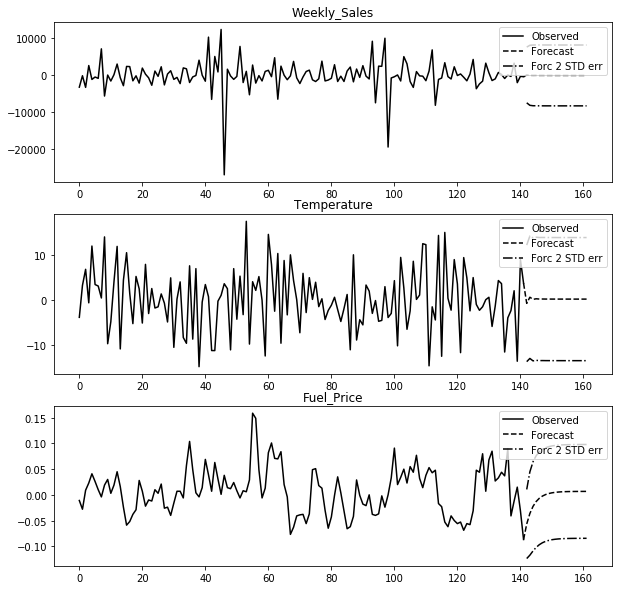

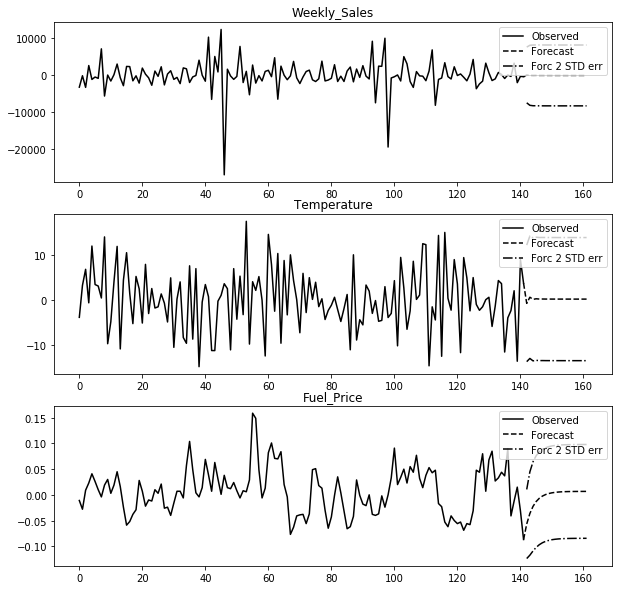

In [33]:
# plotting
results.plot_forecast(20)

In [34]:
# forecasting
nobs=15
pred = results.forecast(results.y, steps=nobs)

/Users/nishantanand/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [35]:
# forecasting
nobs=10
pred = results.forecast(results.y, steps=nobs)
df_forecast = pd.DataFrame(pred, index=df.index[-nobs:], columns=df.columns + '_1d')
df_forecast.tail()
# inverting transformation
def invert_transformation(df, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df[col].iloc[-1]-df[col].iloc[-2]) + df_fc[str(col)+'_1d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc
# show inverted results in a dataframe
df_results = invert_transformation(df, df_forecast, second_diff=True)        
df_results.loc[:, ['Weekly_Sales_forecast']]

Weekly_Sales_forecast
Date                             
2012-08-24           28370.972679
2012-08-31           28150.498199
2012-09-07           27932.353714
2012-09-14           27724.867027
2012-09-21           27511.919480
2012-09-28           27295.404496
2012-10-05           27070.138530
2012-10-12           26835.637029
2012-10-19           26590.212941
2012-10-26           26333.316401